<a href="https://colab.research.google.com/github/BojanKomazec/tensorflow-demo-notebooks/blob/main/autoencoder_vanilla_mnist_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
#
# Vanilla autoencoder
#
# Encoder compresses the input into low-dimensional latent representation 
# vector.
# Decoder reconstructs the input.
#
# Code adapted from
# https://towardsdatascience.com/how-to-make-an-autoencoder-2f2d99cd5103
#
#
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, Flatten,\
                                    Reshape, LeakyReLU as LR,\
                                    Activation, Dropout
from tensorflow.keras.models import Model, Sequential
from matplotlib import pyplot as plt

import numpy as np

#
# If using IPython, Colab or Jupyter - import it if want to clear display (e.g
# after each batch )
#
# from IPython import display 

In [19]:
#
# Load data
#

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [20]:
#
# Min-Max Normalization
#
x_train = x_train/255.0
x_test = x_test/255.0

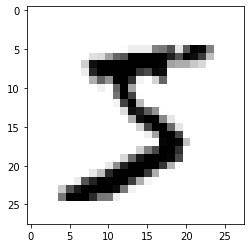

In [21]:
#
# (Optional)
# Plot image data from x_train
#

plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [22]:
#
# Architecture encoder and decoder
#

LATENT_SIZE = 32

encoder = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(512),
    LR(),
    Dropout(0.5),
    Dense(256),
    LR(),
    Dropout(0.5),
    Dense(128),
    LR(),
    Dropout(0.5),
    Dense(64),
    LR(),
    Dropout(0.5),
    Dense(LATENT_SIZE),
    LR()
])

decoder = Sequential([
    Dense(64, input_shape = (LATENT_SIZE,)),
    LR(),
    Dropout(0.5),
    Dense(128),
    LR(),
    Dropout(0.5),
    Dense(256),
    LR(),
    Dropout(0.5),
    Dense(512),
    LR(),
    Dropout(0.5),
    Dense(784),
    Activation("sigmoid"),
    Reshape((28, 28))
])

In [23]:
#
# Create a model
#
# Need to use functional API in order to model this NN.
#

img = Input(shape = (28, 28))
latent_vector = encoder(img)
output = decoder(latent_vector)
model = Model(inputs = img, outputs = output)

In [24]:
#
# Compile the model
#
# We use Nadam optimizer: Nesterov-accelerated Adaptive Moment Estimation
# Nadam algorithm is an extension to the Adaptive Movement Estimation (Adam) 
# optimization algorithm to add Nesterov's Accelerated Gradient (NAG) or 
# Nesterov momentum, which is an improved type of momentum.
#

model.compile("nadam", loss = "binary_crossentropy")

In [25]:
# expected shape of data_set is (SET_LENGTH, IMAGE_WIDTH, IMAGE_HEIGHT)
def plot_examples(data_set):
  PLOT_AXIS_IMAGES_COUNT = 4
  fig, axs = plt.subplots(PLOT_AXIS_IMAGES_COUNT,PLOT_AXIS_IMAGES_COUNT)
  for i in range(PLOT_AXIS_IMAGES_COUNT):
    for j in range(PLOT_AXIS_IMAGES_COUNT):
      axs[i, j].imshow(data_set[i * PLOT_AXIS_IMAGES_COUNT + j], cmap=plt.cm.binary)
      axs[i, j].axis("off")
  
  # plt.subplots_adjust(wspace = 0, hspace = 0)
  plt.tight_layout()
  plt.show()

In [26]:
x_test.shape

(10000, 28, 28)

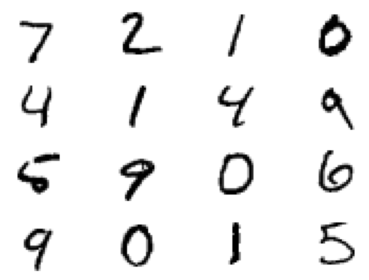

In [27]:
plot_examples(x_test)

In [28]:
def plot_predictions(test_data):
  PLOT_AXIS_IMAGES_COUNT = 4
  fig, axs = plt.subplots(PLOT_AXIS_IMAGES_COUNT,PLOT_AXIS_IMAGES_COUNT)
  for i in range(PLOT_AXIS_IMAGES_COUNT):
    for j in range(PLOT_AXIS_IMAGES_COUNT):
      axs[i, j].imshow(model.predict(test_data[i, j])[0], cmap=plt.cm.binary)
      axs[i, j].axis("off")
  
  # plt.subplots_adjust(wspace = 0, hspace = 0)
  plt.tight_layout()
  plt.show()

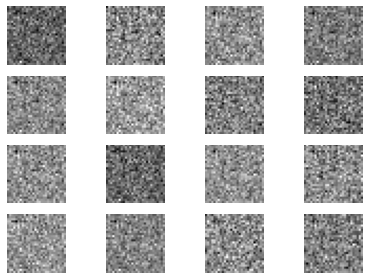

----------- EPOCH 0 -----------
1875/1875 [==============================] - 51s 26ms/step - loss: 0.2372


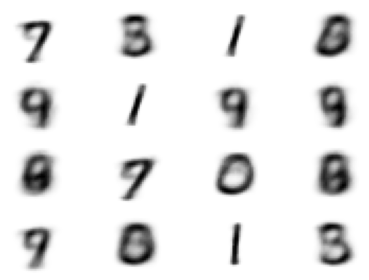

----------- EPOCH 1 -----------
1875/1875 [==============================] - 50s 26ms/step - loss: 0.2096


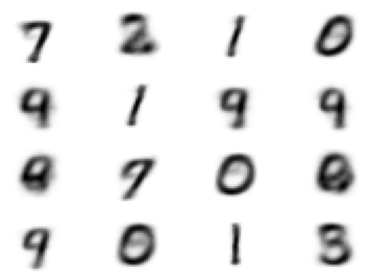

----------- EPOCH 2 -----------
1875/1875 [==============================] - 50s 27ms/step - loss: 0.2030


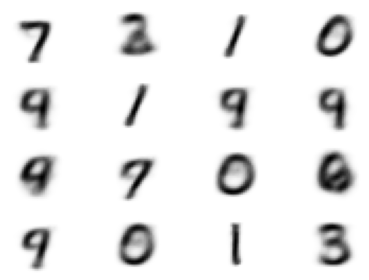

----------- EPOCH 3 -----------
1875/1875 [==============================] - 52s 27ms/step - loss: 0.2002


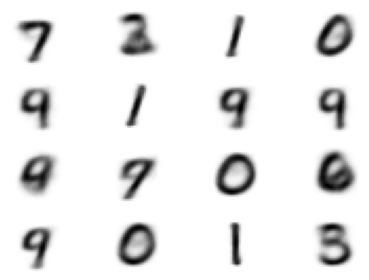

----------- EPOCH 4 -----------
1875/1875 [==============================] - 52s 28ms/step - loss: 0.1985


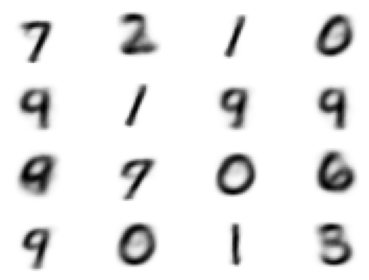

----------- EPOCH 5 -----------
1875/1875 [==============================] - 52s 28ms/step - loss: 0.1973


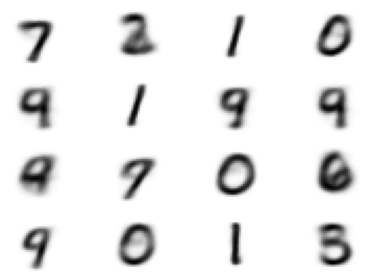

----------- EPOCH 6 -----------
1875/1875 [==============================] - 53s 28ms/step - loss: 0.1967


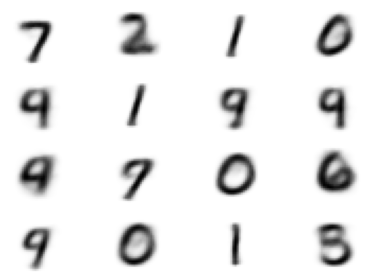

----------- EPOCH 7 -----------
1875/1875 [==============================] - 53s 28ms/step - loss: 0.1960


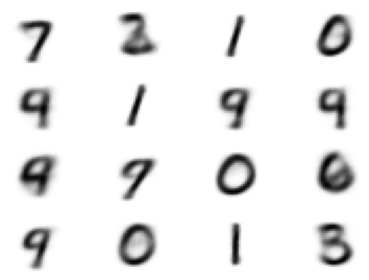

----------- EPOCH 8 -----------
1875/1875 [==============================] - 53s 28ms/step - loss: 0.1956


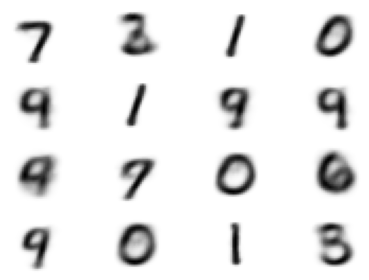

----------- EPOCH 9 -----------
1875/1875 [==============================] - 54s 29ms/step - loss: 0.1955


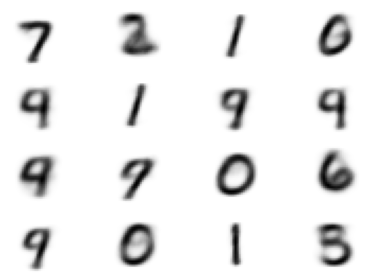

----------- EPOCH 10 -----------
1875/1875 [==============================] - 53s 28ms/step - loss: 0.1953


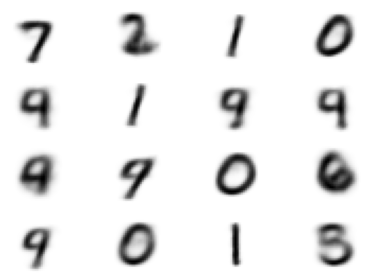

----------- EPOCH 11 -----------
1875/1875 [==============================] - 55s 29ms/step - loss: 0.1951


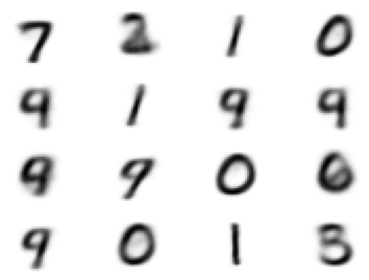

----------- EPOCH 12 -----------
1875/1875 [==============================] - 54s 29ms/step - loss: 0.1949


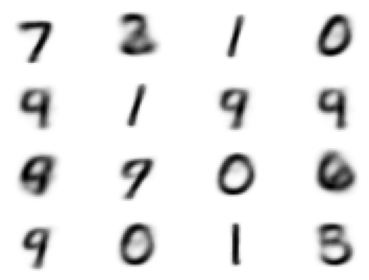

----------- EPOCH 13 -----------
1875/1875 [==============================] - 54s 29ms/step - loss: 0.1946


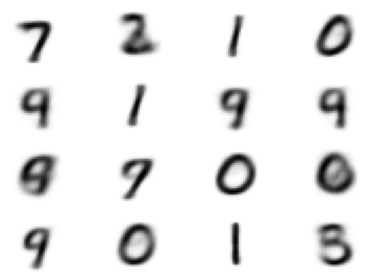

----------- EPOCH 14 -----------
1875/1875 [==============================] - 55s 29ms/step - loss: 0.1948


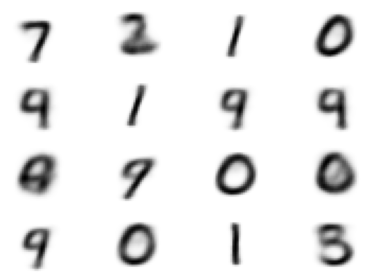

----------- EPOCH 15 -----------
1875/1875 [==============================] - 56s 30ms/step - loss: 0.1945


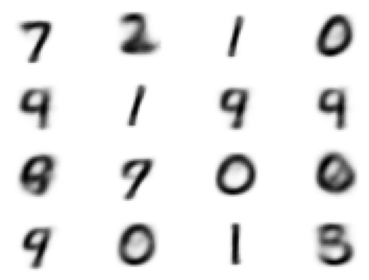

----------- EPOCH 16 -----------
 585/1875 [========>.....................] - ETA: 38s - loss: 0.1943

KeyboardInterrupt: ignored

In [29]:
#
# Train the model
#
# We are also plotting the prediction (generated output for test examples)
# during each epoch.
#

EPOCHS = 60

rand = x_test[np.arange(16)].reshape((4, 4, 1, 28, 28))

for epoch in range(EPOCHS):
    #
    # Use random_test_set if want to show predictions for randomly picked
    # examples from the test set.
    #
    # np.random.randint() returns ndarray of shape (16,)
    # so we can take 16 random images from test set.
    # Before reshaping this collection has shape (16, 28, 28)
    # We reshape it to (4x4)x(batch_size, image_size_x, image_size_y)
    # random_test_set = x_test[np.random.randint(0, 10000, 16)].reshape((4, 4, 1, 28, 28))
    
    # display.clear_output()
    plot_predictions(rand)
    print("-----------", "EPOCH", epoch, "-----------")

    model.fit(x_train, x_train)